In [1]:
from scipy import *
import numpy as np
import WLanalysis

In [31]:
####### check z=1 galaxies
folder='plots/output_eb_5000_s4/'
PDFcmb = mean(load(folder+'ALL_cmb_pdf_1.0.npy'),axis=0)
PDFgal = mean(load(folder+'ALL_gal_pdf_1.0_0.5.npy'),axis=0)

PScross = mean(load(folder+'ALL_cmbXcmb.npy'),axis=0)
PDF2d = mean(load(folder+'ALL_galXcmb_2dpdf_1.5_0.5_1.0.npy'),axis=0)

PDF2d_noiseless = mean(load(folder+'ALL_igalXicmb_2dpdf_1.5_0.5_1.0.npy'),axis=0)

In [32]:
print PDFcmb.shape, PDFgal.shape, PScross.shape, PDF2d.shape
ell = linspace(100, 3000, 19)

(80,) (80,) (20,) (60, 80)


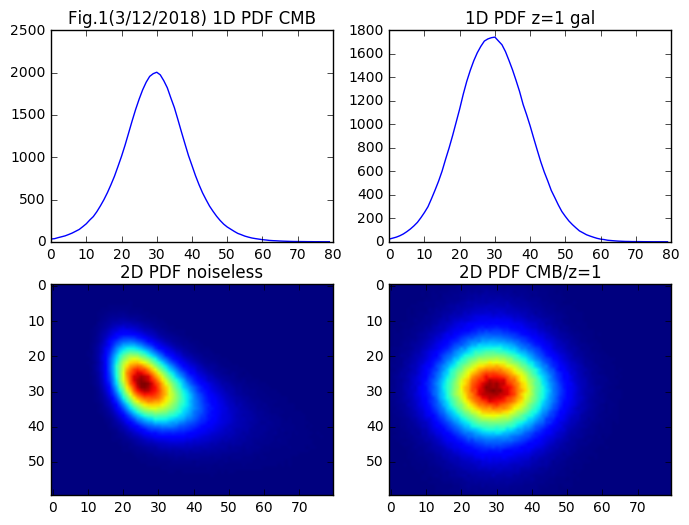

In [33]:
f, ((ax1,ax2),(ax3,ax4))=subplots(2,2,figsize=(8,6))
ax1.plot(PDFcmb)
ax2.plot(PDFgal)
#ax3.plot(ell,PScross*ell)
ax3.imshow(PDF2d_noiseless)
ax4.imshow(PDF2d)#contour(PDF2d)
ax1.set_title('Fig.1(3/12/2018) 1D PDF CMB')
ax2.set_title('1D PDF z=1 gal')
ax3.set_title('2D PDF noiseless')
#ax3.set_ylabel('ell*Cell')
ax4.set_title('2D PDF CMB/z=1')
show() # (n**2 + n)/2 = n(n+1)/2

In [ ]:
## generate average stats, on stampede2
# ALL_fn = genfromtxt('ALL_fn.txt',dtype='string')
# fn_list = genfromtxt('cosmo_params_all.txt',usecols=1, dtype='string')
# fnjia_list = genfromtxt('cosmo_params_all.txt',usecols=0, dtype='string')
# stats_fn = lambda iALL, ieb, icosmo: '/scratch/02977/jialiu/peakaboo/stats/'+icosmo+'/1024b512/'+ieb+'/'+iALL
# stats_dir = '/scratch/02977/jialiu/peakaboo/stats_avg/'
# for ieb in ['output_eb_5000_s4','output_tt_3000_s4']:        
#     for iALL in ALL_fn:
#         out_fn = stats_dir+'%s_%s'%(ieb, iALL)
#         print out_fn
#         out = array([mean(load(stats_fn(iALL, ieb, icosmo)),axis=0) for icosmo in fn_list])
#         save(out_fn, out)

In [35]:
z_source = arange(0.5,3,0.5)
pdf2ds = array([load('stats_avg/output_eb_5000_s4_ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'%(iz)) for iz in z_source])

In [50]:
X, Y = meshgrid(linspace(-3,5,80), linspace(-3,3,60))
print X.shape, Y.shape, pdf2ds.shape
print ilev0

(60, 80) (60, 80) (5, 101, 60, 80)
[0.001249283606203053, 0.00015480930447889422, 9.251917013235691e-06]


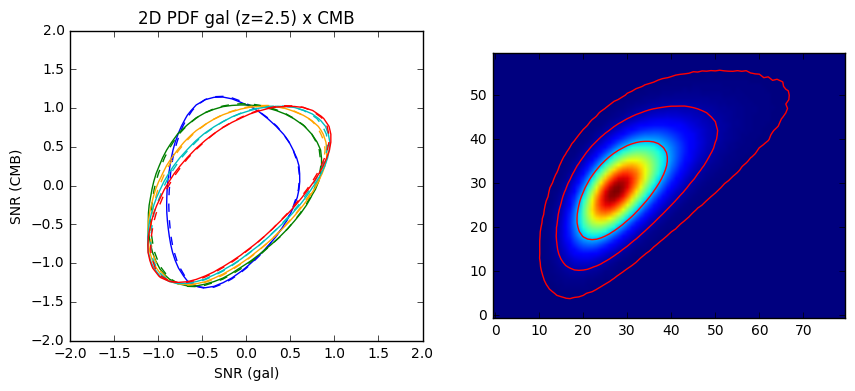

In [72]:
f, (ax1,ax2) = subplots(1,2,figsize=(10,4))
seed(45)
colors=['b','g','orange','c','r']
for iz in range(5):
    icolor=rand(3)
    ipdf0 = pdf2ds[iz, 0]
    ilev0=WLanalysis.findlevel(ipdf0)
    ipdf1 = pdf2ds[iz, 1]
    ilev1=WLanalysis.findlevel(ipdf1)
    ax1.contour(X, Y, ipdf0, levels=[ilev0[0],], colors=colors[iz],label='z=%.1f'%(z_source[iz]))
    ax1.contour(X, Y, ipdf1, levels=[ilev1[0],], colors=colors[iz], linestyles='dashed')
    if iz==4:
        ax2.imshow(ipdf0, origin='lower')
        ax2.contour(ipdf0, levels=sort(ilev0), colors='r',label='z=%.1f'%(z_source[iz]))
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_xlabel('SNR (gal)')
ax1.set_ylabel('SNR (CMB)')
ax1.set_title('Fig.2(3/27/2018) 2D PDF galxCMB')
ax1.set_title('2D PDF gal (z=2.5) x CMB')
show()